In [1]:
import numpy as np
import nltk
import random
import string
import sklearn
from sklearn.feature_extraction import text
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.model_selection import train_test_split
#nltk.download('punkt') 

In [2]:
# to read in data from a text file, first upload the data file into your google drive and then mount your google drive onto colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_google=pd.read_csv('/content/drive/MyDrive/MTECH Project/Article Dataset/Google_compiled_01012023_23032023.csv')
print(len(df_google))
df_google.head()

755


,Relevant,Infectious_Disease,Research_disease,Rare_disease,Genetic_disease,Chronic_disease,headline,link,pub_date,authors,text,summary,keywords,Search_topic,Source
0,N,N,Y,N,N,N,Objective disease activity assessment and ther...,https://bmcgastroenterol.biomedcentral.com/art...,2022-12-27 00:00:00,"['Click', 'Department Of Gastroenterology', 'H...",In this cohort study of IBD patients receiving...,In this cohort study of IBD patients receiving...,"['therapy', 'therapeutic', 'routine', 'targeti...",Disease,Google
1,N,N,Y,N,N,N,Crohn's disease and dietary fiber: What is the...,https://www.medicalnewstoday.com/articles/croh...,NaN,['Rachel Ann Tee-Melegrito'],"Alongside other treatment methods, diet is an ...",Some people with Crohn’s disease may benefit f...,"['symptoms', 'fiber', 'dietary', 'crohns', 'li...",Disease,Google
2,N,N,N,Y,N,N,Northampton parents' plea over toddler with ra...,https://www.bbc.com/news/uk-england-northampto...,NaN,[],"""It's taking Eleni up and down the stairs now ...","""It's taking Eleni up and down the stairs now ...","['unsafe', 'causing', 'plea', 'harm', 'risk', ...",Disease,Google
3,N,N,N,Y,N,N,'Door has been opened' with Rare Disease Drug ...,https://news.google.com/./articles/CBMidWh0dHB...,NaN,"['About The Author', 'Read More']",'Canadians will have equal access to lifesavin...,"On February 28, which is Rare Disease Day, Van...","['treatments', 'access', 'drug', 'door', 'pati...",Disease,Google
4,N,N,N,N,N,Y,Is IBD an Autoimmune Disease?,https://www.healthline.com/health/is-ibd-an-au...,NaN,['Jill Seladi-Schulman'],Inflammatory bowel disease (IBD) includes two ...,But is IBD an autoimmune disease?\nIBD and the...,"['system', 'autoimmune', 'immune', 'inflammati...",Disease,Google


In [4]:
def conditions_disease(s):
    if (s['Infectious_Disease'] =='Y' or s['Research_disease'] =='Y' or s['Rare_disease'] =='Y' or s['Genetic_disease'] =='Y' or s['Chronic_disease'] =='Y'):
        return 'Y'

    else:
        return 'N'

In [5]:
df_google['Disease'] = df_google.apply(conditions_disease, axis=1)

In [33]:
X= df_google['headline']
y=df_google['Disease'] =='Y'

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=123, 
                                   test_size=0.20, 
                                   shuffle=True)

In [35]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import numpy as np
from transformers import AutoTokenizer, AutoModel, pipeline
#using bert model and bert tokeniser for the embeddings
model = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
fe = pipeline('feature-extraction', model=model, tokenizer=tokenizer)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [37]:
import torch
from scipy.spatial.distance import cosine

features = fe('Do you like cookies?')
features = np.squeeze(features)
print(features.shape) #(7,768)
# 7 refers to the number of tokens (while there are 4 words, another token for punctuation and others are assigned by bert for their calculations)
# 768 are the embeddings in each layer. The embeddings output for each layer serve as the input for the next layer, until we get the top layer.

# need one more step to get the average of the seven vectors 
vec = torch.mean(torch.tensor(np.squeeze(features)), dim=0)
print(vec.shape)
print(len(vec))

(7, 768)
torch.Size([768])
768


In [38]:
def vec_trf(sent):
  vec = torch.mean(torch.tensor(np.squeeze(fe(sent))), dim=0)
  return vec

X_train_embed = [ vec_trf(s).numpy() for s in X_train ]
X_test_embed = [ vec_trf(s).numpy() for s in X_test ]

In [56]:
from sklearn import svm
#from sklearn.svm import SVC
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler

clf = svm.SVC()
clf.fit(X_train_embed, y_train)
predictions = svm_clf.predict(X_test_embed)  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

[[61  8]
 [ 7 75]]
              precision    recall  f1-score   support

       False       0.90      0.88      0.89        69
        True       0.90      0.91      0.91        82

    accuracy                           0.90       151
   macro avg       0.90      0.90      0.90       151
weighted avg       0.90      0.90      0.90       151



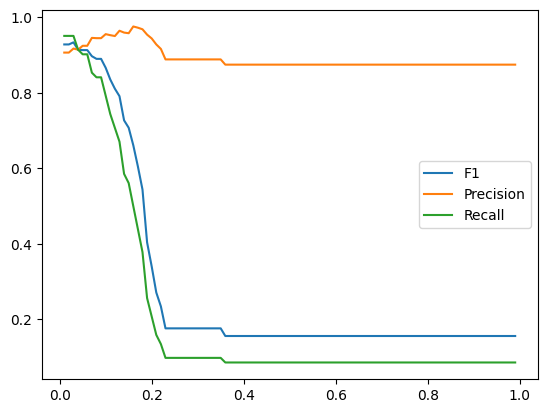

In [44]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
f1_scores = []
recall_scores =[]
precision_scores=[]
gammas = []
for g in range(1,100):
     gamma = g*0.01
     svm_clf=SVC(kernel="rbf",gamma=gamma) 
     svm_clf.fit(X_train_embed,y_train)
    #  svm_clfs.append(svm_clf) 
     predictions = svm_clf.predict(X_test_embed)
     f1_scores.append(f1_score(y_test,predictions))
     precision_scores.append(precision_score(y_test,predictions))
     recall_scores.append(recall_score(y_test,predictions))
     gammas.append(gamma)

plt.plot(gammas,f1_scores, label = 'F1')
plt.plot(gammas,precision_scores, label = 'Precision')
plt.plot(gammas,recall_scores, label = 'Recall')
plt.legend()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


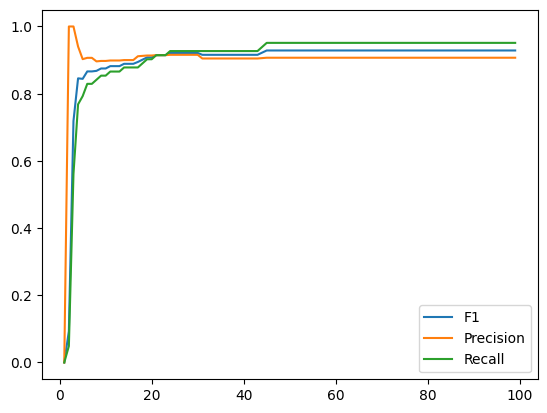

In [46]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
f1_scores = []
recall_scores =[]
precision_scores=[]
Cs = []
for c in range(1,100):
     C= c*0.01
     svm_clf=SVC(kernel="rbf", C=C) 
     svm_clf.fit(X_train_embed,y_train)
    #  svm_clfs.append(svm_clf) 
     predictions = svm_clf.predict(X_test_embed)
     f1_scores.append(f1_score(y_test,predictions))
     precision_scores.append(precision_score(y_test,predictions))
     recall_scores.append(recall_score(y_test,predictions))
     Cs.append(c)

plt.plot(Cs,f1_scores, label = 'F1')
plt.plot(Cs,precision_scores, label = 'Precision')
plt.plot(Cs,recall_scores, label = 'Recall')
plt.legend()

In [53]:
hyperparams = ['linear', 'poly', 'rbf', 'sigmoid']

from sklearn.metrics import classification_report, confusion_matrix  
for k in hyperparams:
    svm_clf=SVC(kernel=k) 
    svm_clf.fit(X_train_embed,y_train)
    predictions = svm_clf.predict(X_test_embed)  
    # gamma, C = hyperparams[i]
    print("Kernel=", k)
    # print("Accuracy=", metrics.accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  

Kernel= linear
[[59 10]
 [13 69]]
              precision    recall  f1-score   support

       False       0.82      0.86      0.84        69
        True       0.87      0.84      0.86        82

    accuracy                           0.85       151
   macro avg       0.85      0.85      0.85       151
weighted avg       0.85      0.85      0.85       151

Kernel= poly
[[61  8]
 [ 4 78]]
              precision    recall  f1-score   support

       False       0.94      0.88      0.91        69
        True       0.91      0.95      0.93        82

    accuracy                           0.92       151
   macro avg       0.92      0.92      0.92       151
weighted avg       0.92      0.92      0.92       151

Kernel= rbf
[[61  8]
 [ 4 78]]
              precision    recall  f1-score   support

       False       0.94      0.88      0.91        69
        True       0.91      0.95      0.93        82

    accuracy                           0.92       151
   macro avg       0.92      0.

In [60]:
# Best Model

svm_clf=SVC(kernel="rbf", C=50, probability=True) 
svm_clf.fit(X_train_embed,y_train)
predictions = svm_clf.predict(X_test_embed)  
# gamma, C = hyperparams[i]
print("Kernel=", k)
# print("Accuracy=", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Kernel= sigmoid
[[61  8]
 [ 7 75]]
              precision    recall  f1-score   support

       False       0.90      0.88      0.89        69
        True       0.90      0.91      0.91        82

    accuracy                           0.90       151
   macro avg       0.90      0.90      0.90       151
weighted avg       0.90      0.90      0.90       151



Text(0.5, 0, 'Prob')

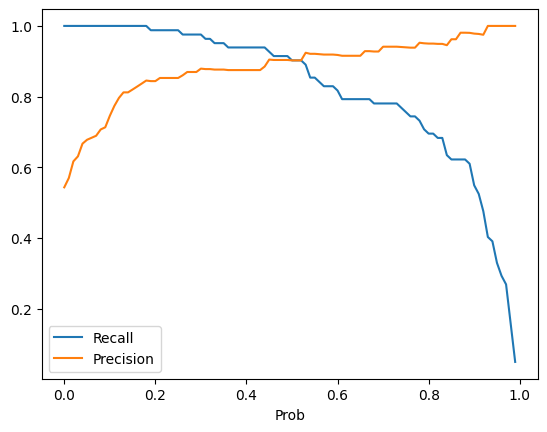

In [65]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score, accuracy_score
precisions =[]
recalls =[]
indices = []
increment = 0.01
for i in range(0,100):
    threshold = i*increment
    predicted_proba = svm_clf.predict_proba(X_test_embed)
    predicted = (predicted_proba[:,1] >= threshold).astype('int')
    accuracy = accuracy_score(y_test, predicted)
    precisions.append(precision_score(y_test, predicted))
    recalls.append(recall_score(y_test, predicted))
    indices.append(threshold)
plt.plot(indices,recalls, label='Recall')
plt.plot(indices,precisions, label='Precision')
plt.legend()
plt.xlabel('Prob')

In [72]:
threshold = 0.3
predicted_proba = svm_clf.predict_proba(X_test_embed)
predicted = (predicted_proba[:,1] >= threshold).astype('int')

print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))  

[[58 11]
 [ 2 80]]
              precision    recall  f1-score   support

       False       0.97      0.84      0.90        69
        True       0.88      0.98      0.92        82

    accuracy                           0.91       151
   macro avg       0.92      0.91      0.91       151
weighted avg       0.92      0.91      0.91       151



In [74]:
predicted_proba[:,1] 

array([0.25051045, 0.75941456, 0.65447773, 0.11370689, 0.92430687,
       0.981739  , 0.9774158 , 0.01161991, 0.88032414, 0.9929966 ,
       0.03124276, 0.92907525, 0.9898476 , 0.97251988, 0.94922095,
       0.78939825, 0.1266531 , 0.83888739, 0.86336064, 0.09711028,
       0.94053615, 0.10866449, 0.01334937, 0.20885192, 0.07461588,
       0.83385114, 0.03595386, 0.89635873, 0.01463162, 0.7810372 ,
       0.045811  , 0.53568738, 0.89208744, 0.03261656, 0.9115057 ,
       0.93722458, 0.01699781, 0.29057288, 0.9770608 , 0.56191097,
       0.94933204, 0.97671729, 0.99356396, 0.94267137, 0.03051429,
       0.77188506, 0.45299127, 0.97521867, 0.1040557 , 0.15870922,
       0.90467345, 0.98684959, 0.07895606, 0.89378194, 0.53923841,
       0.98609766, 0.95821706, 0.18577328, 0.07820406, 0.73959911,
       0.69764907, 0.96885991, 0.00496314, 0.01212264, 0.98414684,
       0.99290133, 0.26805381, 0.1667332 , 0.01289186, 0.83680888,
       0.77715713, 0.01015756, 0.53025996, 0.79341197, 0.97042

In [81]:
import pickle
pickle.dump(svm_clf,open('/content/drive/MyDrive/ContextualisedEmbeding-SVM-Model.pkl','wb') )